In [1]:
import pandas as pd
import pandas as pd
import requests
import io
df=pd.read_csv('apparel-trainval.csv')


In [2]:
epoch_error = []

In [3]:
from numpy import random,exp,array, dot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
class NeuralNetwork():
    def ini(self, gateInput, gateOutput):
        self.gateInput = gateInput
        self.gateOutput = gateOutput
        self.input_shape = (1,784)
        print(self.input_shape)
        self.output_shape = (1,10)
        print((self.output_shape))
        self.layer_nodes = 130   
        self.hidden_layers = 2
        self.a = {}

    def error(self,y1,y_hat):
        return sum(0.5*np.sum((y1-y_hat)*(y1-y_hat),axis = 1))

    def initialization(self,):
        self.weights = {}       
        self.weights[0] = 2 * np.random.random((self.input_shape[1], self.layer_nodes)) - 1
        for i in range(1,self.hidden_layers):
              self.weights[i] = 2 * np.random.random((self.layer_nodes, self.layer_nodes)) - 1
        self.weights[self.hidden_layers] = 2 * np.random.random((self.layer_nodes,self.output_shape[1])) - 1

    def sigmoid(self, x):
        return (1/(1+exp(-x)))
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def think(self, x):
        layer1 = self.sigmoid(dot(x, self.weights[0]))
        for i in range(1,self.hidden_layers):
            layer2 = self.sigmoid(dot(layer1, self.weights[i]))
            layer1=layer2
        output = self.sigmoid(dot(layer1, self.weights[self.hidden_layers]))
        return output

    def softmax(self,a):
        mx = np.sum(a,axis = 1,keepdims = True)
        ex = np.divide(a,mx)
        return ex

    def train(self, num_steps):
        for x in range(num_steps):
            self.a[0] = self.sigmoid(dot(self.gateInput, self.weights[0]))
            for i in range(1,self.hidden_layers):
                self.a[i] = self.sigmoid(dot(self.a[i-1], self.weights[i]))
            output = self.sigmoid(dot(self.a[self.hidden_layers-1], self.weights[self.hidden_layers]))
            epoch_error.append(self.error(self.gateOutput,self.softmax(output)))
            outputError = -(self.gateOutput - self.softmax(output))
            delta = outputError * self.sigmoid_derivative(output)
            out_weights_adjustment = dot(self.a[self.hidden_layers-1].T, delta)
            self.weights[self.hidden_layers] -= .001*out_weights_adjustment
            #                   print("5")
            for i in np.arange(self.hidden_layers-1,0,-1):
            #                       print(i)
                delta = dot(delta, self.weights[i+1].T) * self.sigmoid_derivative(self.a[i])
                weight_2_adjustment = dot(self.a[i-1].T, delta)
                x1=self.weights[i]-.001*weight_2_adjustment
                self.weights[i] = x1
            delta = dot(delta, self.weights[1].T) * self.sigmoid_derivative(self.a[0])
            weight_1_adjustment = dot(self.gateInput.T, delta)
            self.weights[0] -= 0.001*weight_1_adjustment





In [4]:
file = df[0:10000]  
X= file.drop(['label'],axis=1)
y =pd.DataFrame(file['label'])
X=(X-X.mean())/X.std()
y=pd.concat([y,pd.get_dummies(y['label'],prefix='label')],axis=1).drop(['label'],axis=1)




In [5]:
neural_network = NeuralNetwork()
neural_network.ini(X,y)
neural_network.initialization()
neural_network.train(1500)

(1, 784)
(1, 10)


Text(0.5, 1.0, 'Epoch vs Error')

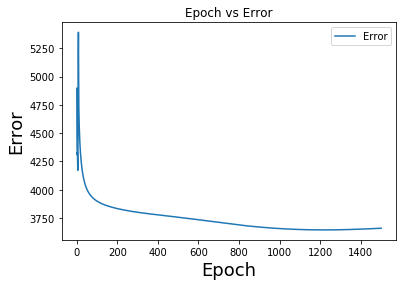

In [8]:
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x_axis = [i for i in range(1,1501,1)]
ax.plot(x_axis, epoch_error, label="Error")
ax.legend(loc=1)
ax.set_xlabel("Epoch", fontsize=18)
ax.set_ylabel("Error", fontsize=18)
ax.set_title('Epoch vs Error')